A colection of python tools for radio astronomy image analysis. <br>
By Geferson Lucatelli

Objectives:
1. Basic image manipulation and plotting.
2. Caracterize the radio emission of Local U/LIRGs.
3. Disentangle the radio sub-components on these structures, e.g. compact components, diffuse emission
4. Break down the total flux contribution coming from the diffuse emission in relation to the compact/AGN emission


Basically, this notebook contains:

    1. Plotting capabilities
    2. Signal processing / Image analysis (non-parametric)
    3. Source Extraction

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import casatasks
from casatasks import *
import casatools
import casaviewer
import casaplotms
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.fits as pf
from matplotlib.gridspec import GridSpec
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
from casaviewer import imview as imview

def reset_rc_params():
    mpl.rcParams.update({'font.size': 16, 
                         "text.usetex": False,#         
                         "font.family": "sans-serif",
                         'mathtext.fontset': 'stix',
                         "font.family": "sans",
                         'font.weight': 'medium', #medium, semibold, light, 500
                         'font.family': 'STIXGeneral',
                         'xtick.labelsize':16,
                         'figure.figsize': (6,4),
                         'ytick.labelsize':16,
                         'axes.labelsize' : 16,
                         'xtick.major.width':1,
                         'ytick.major.width':1,
                         'axes.linewidth':1.5,
                         'axes.edgecolor':'black',
                         'lines.linewidth':2,
                         'legend.fontsize':14,
                         'grid.linestyle':'--',
                         'axes.grid.which': 'major',  # set the grid to appear only on major ticks
                         'axes.grid.axis': 'both',  # set the grid to appear on both the x and y axis
                          'axes.spines.right': False,  
                         'axes.grid': True,
        })
    pass
reset_rc_params()


# Import external libraries
import sys
# sys.path.append('../../scripts/analysis_scripts/')
sys.path.append('../analysis_scripts/')
sys.path.append('../libs/')
sys.path.append('/opt/casa-6.5.1-23-py3.8/')
import analysisUtils as au
from analysisUtils import *
from libs import *

from matplotlib.patches import Circle
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.patches import Circle


You appear to be importing analysisUtils into python (not CASA). version =  3.8.16
CASAPATH is not defined, so I am skipping a lot of imports

                                                          ..___|**_
                                                  .|||||||||*+@+*__*++.
                                              _||||.           .*+;].,#_
                                         _|||*_                _    .@@@#@.
                                   _|||||_               .@##@#| _||_
   Radio Morphen              |****_                   .@.,/\..@_.
                             #///#+++*|    .       .@@@;#.,.\@.
                              .||__|**|||||*||*+@#];_.  ;,;_
 Geferson Lucatelli                            +\*_.__|**#
                                              |..      .]]
                                               ;@       @.*.
                                                #|       _;]];|.
                                                 ]_          _

# 2. Manipulating Dada
## 2.1 Reading Imaging Data

A set of example images can be found in this link: 

https://filedn.com/lNSVniBJI40jEXAJtSnTjPQ/astrodata/LIRGI_sample/data_examples/data_examples.tar.xz
<br>
With this, you can experiment with the usage of these tools. 

In [38]:
# root_path  = '/home/sagauga/pCloudDrive/PhD/'
root_path = '../data_examples/vla_only/VV705_C/' #lets start only with JVLA images.
prefix_images = 'MFS_images/south/*MFS-image.cutout_south.fits'
prefix_residuals = 'MFS_residuals/south/*MFS-residual.cutout_south.fits' # in many parts of the code, we require the residual images.
# root_path  = '/Volumes/astronomical_data/cloud/pcloud_mac/PhD/'

In [39]:
imagelist = glob.glob(root_path+prefix_images)
residuallist = glob.glob(root_path+prefix_residuals)

In [40]:
#this function is helpfull to sort the image list according to the restoring beam size (from smaller beams to larger beams). 
imagelist,residuallist=sort_list_by_beam_size(imagelist,residuallist)

100%|████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 73.95it/s]

0 >> clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..0.0-MFS-image.cutout_south.fits
1 >> clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..0.5-MFS-image.cutout_south.fits
2 >> clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..1.0-MFS-image.cutout_south.fits
3 >> clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..2.0-MFS-image.cutout_south.fits


In [42]:
imagelist

array(['../data_examples/vla_only/VV705_C/MFS_images/south/clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..0.0-MFS-image.cutout_south.fits',
       '../data_examples/vla_only/VV705_C/MFS_images/south/clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..0.5-MFS-image.cutout_south.fits',
       '../data_examples/vla_only/VV705_C/MFS_images/south/clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..1.0-MFS-image.cutout_south.fits',
       '../data_examples/vla_only/VV705_C/MFS_images/south/clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..2.0-MFS-image.cutout_south.fits'],
      dtype=object)

For general use, you can use the function `ctn`, means, casa to numpy. It just reads fits files, even those cases that astropy wont work at first glance (e.g. some CASA converted images). 

In [43]:
ctn??

In [44]:
idx = -2

image_data = ctn(imagelist[idx])
residual_data = ctn(residuallist[idx])
print(image_data)

[[-4.90354159e-06 -5.37807364e-06 -5.85909038e-06 ... -5.39147038e-07
  -3.50299956e-07 -1.75332346e-07]
 [-4.75329762e-06 -5.22785649e-06 -5.70838529e-06 ... -5.16674845e-07
  -3.31064513e-07 -1.60171524e-07]
 [-4.59931198e-06 -5.07425102e-06 -5.55457336e-06 ... -4.97504288e-07
  -3.15863161e-07 -1.49645132e-07]
 ...
 [ 4.06249455e-06  4.14484657e-06  4.20905508e-06 ...  1.18932735e-06
   9.98911673e-07  8.22452591e-07]
 [ 4.10369876e-06  4.19306161e-06  4.26350425e-06 ...  1.35963592e-06
   1.18175319e-06  1.01753972e-06]
 [ 4.12980808e-06  4.22662197e-06  4.30376986e-06 ...  1.50318965e-06
   1.33767753e-06  1.18559853e-06]]


## 2.3 Quick look to the data

Quick check of the image(s).

`eimshow` is a wraper for plt.imshow, means enhanced-imshow, designed to be customized and fast. Default arguments works well.

Imported cmasher for density maps.If you would like to use, examples:CM = cmr.ember,CM = cmr.flamingo,CM = cmr.gothicCM = cmr.lavender


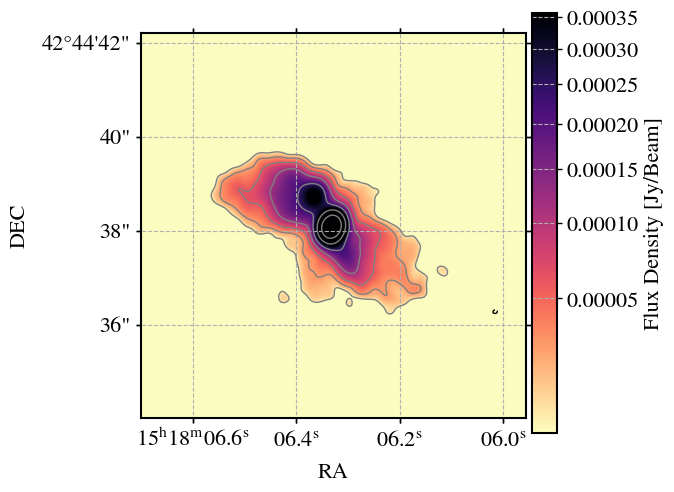

In [45]:
ax=eimshow(imagelist[idx],
        vmin_factor=3.0,vmax_factor=0.19, #level factor (max from peak, and min from std)
        neg_levels=np.asarray([-3]), # negative contours to draw -- which std level?
        CM='magma_r',
       )

Imported cmasher for density maps.If you would like to use, examples:CM = cmr.ember,CM = cmr.flamingo,CM = cmr.gothicCM = cmr.lavender


/home/sagauga/miniconda3/envs/numba/lib/python3.8/site-packages/numpy/core/function_base.py:424: RuntimeWarning: invalid value encountered in log10
  log_stop = _nx.log10(stop)
/home/sagauga/miniconda3/envs/numba/lib/python3.8/site-packages/numpy/core/function_base.py:423: RuntimeWarning: invalid value encountered in log10
  log_start = _nx.log10(start)


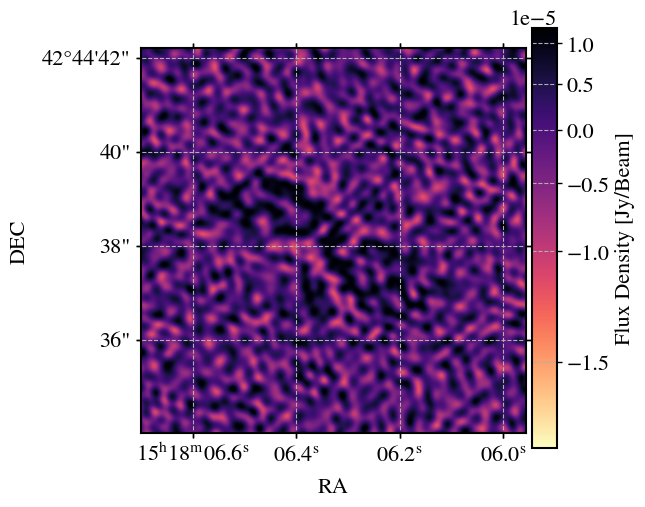

In [46]:
ax=eimshow(residuallist[idx],
        vmin_factor=-3.0,vmax_factor=0.99, #level factor (max from peak, and min from std)
        neg_levels=np.asarray([0]), # negative contours to draw -- which std level?
        CM='magma_r',add_contours=False # remove contours
       )

Want to zoom-in in the image? 

Imported cmasher for density maps.If you would like to use, examples:CM = cmr.ember,CM = cmr.flamingo,CM = cmr.gothicCM = cmr.lavender
  >> Center -->  [508 509   0   0]


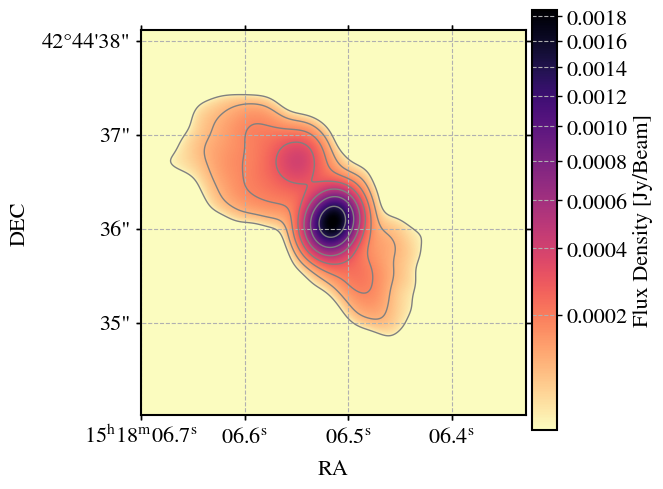

In [47]:
ax=eimshow(imagelist[idx],
        vmin_factor=3.0,vmax_factor=0.99, #level factor (max from peak, and min from std)
        neg_levels=np.asarray([-3]), # negative contours to draw -- which std level?
        CM='magma_r',crop=True,box_size=256
       )

If the zoom-in is not computing the rms value properly, you can provide it (e.g. use the residual rms or data rms):

Imported cmasher for density maps.If you would like to use, examples:CM = cmr.ember,CM = cmr.flamingo,CM = cmr.gothicCM = cmr.lavender
  >> Center -->  [508 509   0   0]


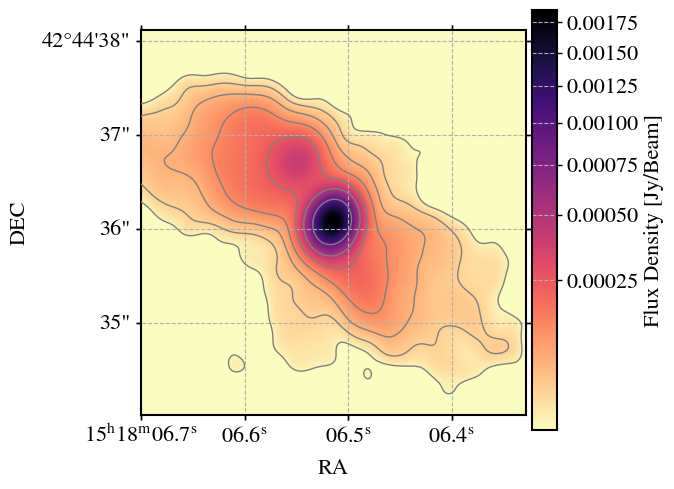

In [48]:
rms = mad_std(residual_data)
ax=eimshow(imagelist[idx],rms=rms,
        vmin_factor=3.0,vmax_factor=0.99, #level factor (max from peak, and min from std)
        neg_levels=np.asarray([-3]), # negative contours to draw -- which std level?
        CM='magma_r',crop=True,box_size=256
       )

## 2.2 Basic Image Analysis

The default option of the following functions is to receive the imagefile as actually the filename, not the data it contains. Why? Because radio astronomy requires constantly reading information from the image header. 
You can provide as input a numpy array using the `data_2D` option, but you MUST provide the file name from which that data comes from. 

I am going to demonstrate the usage of the code for two extreme case, to demonstrate that it can do reliable measurements. 
The first case, is for a normal radio emission, with enough SNR, and the other case is an extreme situation, with poor SNR (e.g. eMERLIN image of VV 250 NW). 

In [49]:
imagename = imagelist[idx]

### `level_statistics()`
Function to compute basic image statistics, such as total flux density and uncertain flux. 

It splits the range of image intensity values in four distinct regions:

    1. Inner region: peak intensity -> 0.1 * peak intensity
    2. Mid region: 0.1 * peak intensity -> 10 * rms
    3. Low region: 10 * rms -> 5 * rms
    4. Uncertain region: 5 * rms -> 3 * rms
    
The flux uncertainty is computed as being the flux from $5 \times {\rm rms}$ to $3 \times {\rm rms}$.

In [50]:
level_statistics??

Mad    >   5.0153418165914765e-06
std    >   8.50064576325683e-05
median >   1.2828410262955003e-06
mean   >   1.5721231232547443e-05
0.006092570502350531
2.9665574885365167e-06
0.006263816425549067
Low Flux (extended) Jy                    >  0.0005211671232820244  >> ratio= 0.08562588712190347
Mid Flux (outer core + inner extended) Jy >  0.0017224539386352271  >> ratio= 0.28299299770382313
Inner Flux (core) Jy                      >  0.003549833072949846  >> ratio= 0.5832248283273226
Uncertain Flux (<5std)                    >  0.00029310614263462905  >> ratio= 0.048156286846950704
Total Flux Jy                             >  0.006086560277501727
Total area (in # ob beams)                >  49.93451047396413
Total inner area (in # ob beams)          >  7.695589887298317
Total mid area (in # ob beams)            >  17.064200180155044
Total low area (in # ob beams)            >  14.293058272878756
Total uncertain area (in # ob beams)      >  17.139434802072046
Inner Flux (core) fractio

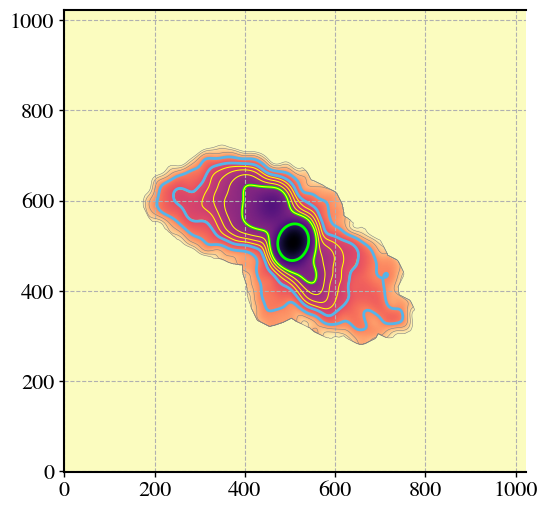

In [51]:
dict_results = level_statistics(img=imagename, cell_size=None,crop=False,apply_mask=True,
                                 results=None,SAVE=True, ext='.jpg',show_figure=True)


In [52]:
print(dict_results['total_flux']*1000,'+/-',dict_results['uncertain_flux']*1000,'mJy')

6.086560277501727 +/- 0.29310614263462903 mJy


5.999


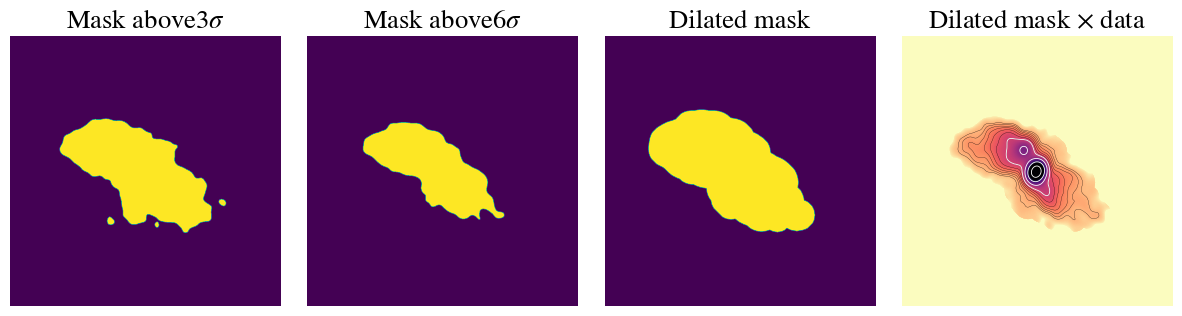

Inner Perimeter (%50): 502.6361526181746
Outer Perimeter (%90): 1320.2716234509544
Outer Perimeter (%99): 1730.4185574163705
128 512 384
ctr=(  507.50   508.00)     I=    0.00     q=    0.87     PA=   90.00
ctr=(  507.50   508.00)     I=    0.00     q=    0.83     PA=   90.00
ctr=(  507.50   508.50)     I=    0.00     q=    0.86     PA=   90.00
ctr=(  507.00   508.00)     I=    0.00     q=    0.86     PA=   90.00
ctr=(  507.50   508.00)     I=    0.00     q=    0.84     PA=   90.00
ctr=(  507.00   508.00)     I=    0.00     q=    0.87     PA=   90.00
ctr=(  507.50   508.00)     I=    0.00     q=    0.85     PA=   90.00
ctr=(  507.00   508.00)     I=    0.00     q=    0.84     PA=   90.00
ctr=(  507.50   508.00)     I=    0.00     q=    0.86     PA=   90.00
ctr=(  507.01   508.01)     I=    0.00     q=    0.84     PA=   89.99
ctr=(  507.05   507.57)     I=    0.00     q=    0.83     PA=  179.87
ctr=(  507.07   508.06)     I=    0.00     q=    0.82     PA=  179.72
ctr=(  507.09   508.07)

/run/media/sagauga/storage_wd_2/cloud/pcloud_void/PhD/GitHub/morphen/radio_morphen/../libs/fitEllipse2018.py:392: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(gal), origin='lower')
/run/media/sagauga/storage_wd_2/cloud/pcloud_void/PhD/GitHub/morphen/radio_morphen/../libs/fitEllipse2018.py:392: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(gal), origin='lower')


Initial PA and q =  142.27387592189973 0.4538007051535399
Median PA and q =  139.6522407021245 0.5974711660575154
Inner-Mean PA and q =  110.64938606855125 0.7908281710990503
Outer-Mean PA and q =  144.67022936643073 0.5442420743568207
26.330190506494557 66.42838212816785 124.73439351990093 160.97704132646493
R50/R50_100 >>  0.09653429150389606
R50 >>  66.42838212816785
R50_100 >>  213.8025440101114
Gaussianity >>  0.1284637020935576
Sum of fluxes =  0.0061175775047108165


<Figure size 600x400 with 0 Axes>

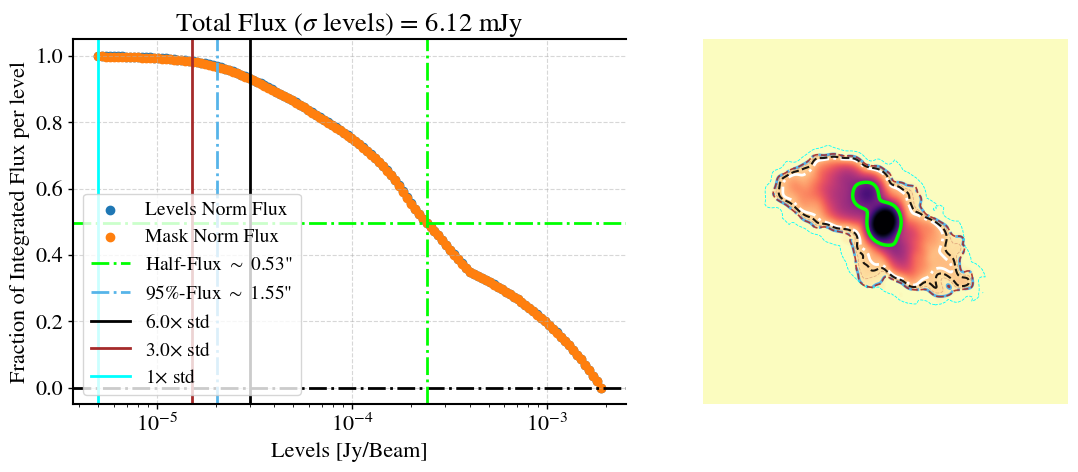

In [53]:
residualname = residuallist[idx]
cell_size = get_cell_size(imagelist[idx]) # for safety reasons
levels, fluxes, agrow, plt, \
    omask, mask, results_final = make_flux_vs_std(imagename,cell_size=cell_size,
                                                  residual=residualname,sigma_mask=6,dilation_size=None,
                                                  crop=False,iterations=2,box_size=100,
                                                 last_level=1,mask = None,
                                                 apply_mask=True, vmin_factor=3,
                                                 results=None,show_figure=True)

In [54]:
imview(''+imagelist[idx]+'')

Lets convert the pixel size to a linear size scale. We can use the function `pixsize_to_pc`. 

In [55]:
pixsize_to_pc??

In [19]:
pix_to_pc = pixsize_to_pc(z=z_d['VV250'],cell_size=get_cell_size(imagename))

D_a =  132.2397807654678 Mpc
Linear Distance =  5.128932392161905 pc


Then, we can check what is the size of the emission. 

In [20]:
np.sqrt((results_final['conv_AT']/np.pi))*pix_to_pc

1337.7599100504265

In [21]:
results_final['C95radii']*pix_to_pc

1062.8118871226593

In [22]:
# Possition angle of the ~nuclear region
results_final['PAmi']

165.98457165618822

In [24]:
# Possition angle of the outer region
results_final['PAmo']

93.82466299401185

In [26]:
# large scale axis ratio (e.g. outer region)
results_final['qmo']

0.608406213829704

In [32]:
#elongation along the semi-major axis
results_final['C95radii']*pix_to_pc/results_final['qmo']

1746.8787513405407

In [33]:
#elongation along the semi-minor axis
results_final['qmo'] *results_final['C95radii']*pix_to_pc

646.6213562574998

# Some Image statistics

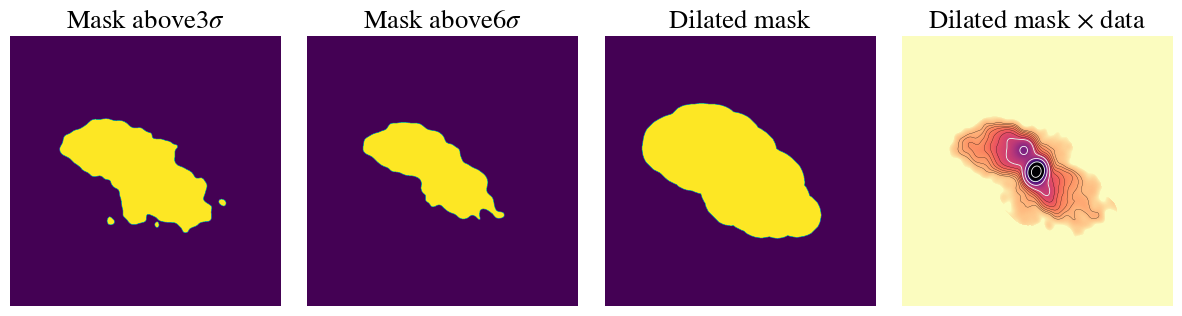

In [56]:
img_stats = get_image_statistics(imagename=imagelist[idx],cell_size=cell_size,
                         mask_component=None,mask=None,
                         residual_name=None,region='', dic_data=None,
                         sigma_mask=6,apply_mask=True,
                         fracX=0.1, fracY=0.1)

In [57]:
img_stats

{'#imagename': 'clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..1.0-MFS-image.cutout_south.fits',
 'max_im': 0.0018736319616436958,
 'min_im': -1.57177091750782e-05,
 'rms_im': 8.644798985925004e-05,
 'rms_box': 3.863512964702095e-06,
 'sigma_im': 8.500649816683472e-05,
 'sigma_box': 3.5476035677832315e-06,
 'flux_im': 0.0062638164255490614,
 'flux_box': -6.169643863875988e-06,
 'q_sq': 49484.651322717495,
 'q_flux': -1015.2638569990183,
 'snr': 1621.2748560123048,
 'snr_im': 72.45762956139836,
 'DR_SNR_E': 513.3261349181241,
 'DR_pk_rmsbox': 484.9555259065027,
 'DR_pk_rmsim': 21.67351681275924,
 'bmajor': 0.4266657334801584,
 'bminor': 0.34839766531733757,
 'positionangle': 164.493559344612}

Providing a residual image (the residual map created during cleaning), you can get an error estimates for the total fluxes. 


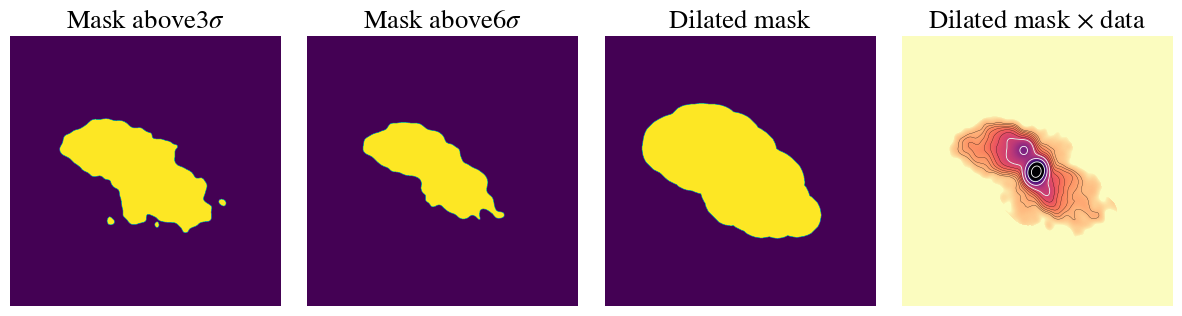

Estimate #1 of flux error (based on sum of residual map): 
Flux =  6.187505973068983 +/- 0.294658395137619 mJy
Fractional error flux =  0.04762151283895558
-----------------------------------------------------------------
Estimate #2 of flux error (based on rms of residual x area): 
Flux =  6.187505973068983 +/- 0.499753701852269 mJy
Fractional error flux =  0.08076819707769797


In [58]:
img_stats = get_image_statistics(imagename=imagelist[idx],cell_size=cell_size,
                         mask_component=None,mask=None,
                         residual_name=residuallist[idx],region='', dic_data=None,
                         sigma_mask=6,apply_mask=True,
                         fracX=0.1, fracY=0.1)

In [59]:
img_stats

{'#imagename': 'clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..1.0-MFS-image.cutout_south.fits',
 'max_im': 0.0018736319616436958,
 'min_im': -1.57177091750782e-05,
 'rms_im': 8.644798985925004e-05,
 'rms_box': 3.863512964702095e-06,
 'sigma_im': 8.500649816683472e-05,
 'sigma_box': 3.5476035677832315e-06,
 'flux_im': 0.0062638164255490614,
 'flux_box': -6.169643863875988e-06,
 'q_sq': 49484.651322717495,
 'q_flux': -1015.2638569990183,
 'snr': 1621.2748560123048,
 'snr_im': 72.45762956139836,
 'DR_SNR_E': 513.3261349181241,
 'DR_pk_rmsbox': 484.9555259065027,
 'DR_pk_rmsim': 21.67351681275924,
 'bmajor': 0.4266657334801584,
 'bminor': 0.34839766531733757,
 'positionangle': 164.493559344612,
 'max_residual': 1.2152904673712328e-05,
 'min_residual': -1.2175622941867914e-05,
 'flux_residual': 2.383620676036145e-05,
 'flux_error_res': 0.00029465839513761896,
 'flux_error_res_2': 0.000499753701852269,
 'mad_std_residual': 5.397688243

All possible measurements are merged into a single function, called `measures`. For that, you must provide the redshift of the source. 

In this case, we are using as an example, VV705, which is at redshift ~ 0.04

In [60]:
z_d['VV705']

0.04019

     >> CALC: Performing mask dilation.


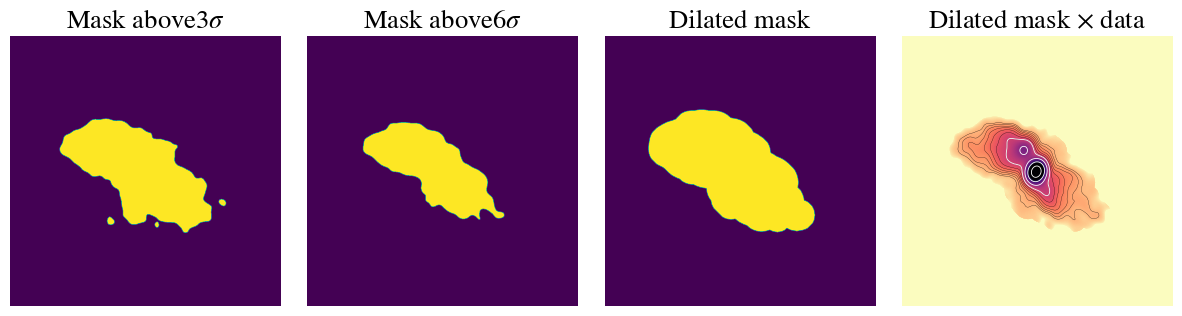

0.0061263152596682585
2.96319730174237e-06
0.006263816425549067
Mad    >   5.0153418165914765e-06
std    >   8.50064576325683e-05
median >   1.2828410262955003e-06
mean   >   1.5721231232547443e-05
Low Flux (extended) Jy                    >  0.0005211671232820244  >> ratio= 0.0852790269450079
Mid Flux (outer core + inner extended) Jy >  0.0017224539386352271  >> ratio= 0.2818466270845732
Inner Flux (core) Jy                      >  0.003549833072949846  >> ratio= 0.5808622546486931
Uncertain Flux (<5std)                    >  0.0003178623511676053  >> ratio= 0.05201209132172579
Total Flux Jy                             >  0.006111316486034702
Total area (in # ob beams)                >  50.080800016580525
Total inner area (in # ob beams)          >  7.695589887298317
Total mid area (in # ob beams)            >  17.064200180155044
Total low area (in # ob beams)            >  14.293058272878756
Total uncertain area (in # ob beams)      >  19.647635505476785
Inner Flux (core) fraction   

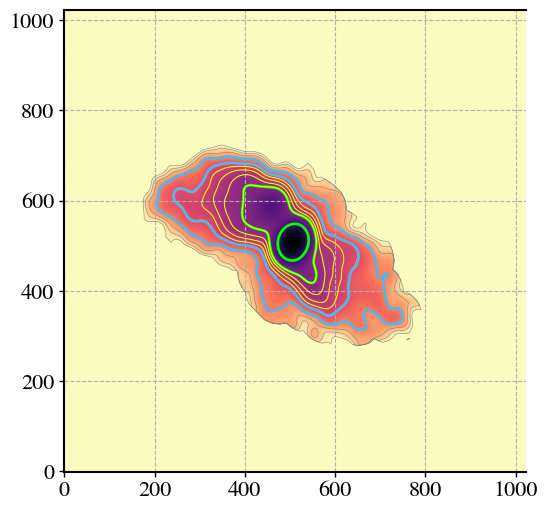

5.999
Inner Perimeter (%50): 493.1555581284894
Outer Perimeter (%90): 1262.1425827571902
Outer Perimeter (%99): 1730.4185574163705
128 512 384
ctr=(  507.50   508.00)     I=    0.00     q=    0.87     PA=   90.00
ctr=(  507.50   508.50)     I=    0.00     q=    0.85     PA=   90.00
ctr=(  507.00   508.00)     I=    0.00     q=    0.85     PA=   90.00
ctr=(  507.50   508.00)     I=    0.00     q=    0.84     PA=   90.00
ctr=(  507.00   508.00)     I=    0.00     q=    0.86     PA=   90.00
ctr=(  507.50   508.00)     I=    0.00     q=    0.84     PA=   90.00
ctr=(  507.00   508.00)     I=    0.00     q=    0.87     PA=   90.00
ctr=(  507.00   508.00)     I=    0.00     q=    0.83     PA=   90.00
ctr=(  507.50   508.00)     I=    0.00     q=    0.85     PA=   90.00
ctr=(  507.00   508.00)     I=    0.00     q=    0.84     PA=   90.00
ctr=(  507.50   508.00)     I=    0.00     q=    0.86     PA=   90.00
ctr=(  507.02   508.01)     I=    0.00     q=    0.84     PA=   89.99
ctr=(  507.04   5

/run/media/sagauga/storage_wd_2/cloud/pcloud_void/PhD/GitHub/morphen/radio_morphen/../libs/fitEllipse2018.py:392: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(gal), origin='lower')
/run/media/sagauga/storage_wd_2/cloud/pcloud_void/PhD/GitHub/morphen/radio_morphen/../libs/fitEllipse2018.py:392: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(gal), origin='lower')


Initial PA and q =  142.27387592189973 0.4538007051535399
Median PA and q =  142.3430361371262 0.6352772984747399
Inner-Mean PA and q =  110.1229170179625 0.7894833758551614
Outer-Mean PA and q =  144.97434224492395 0.5624207727323515
26.354357735544063 64.75657835760981 120.37219786597798 155.84811793940327
R50/R50_100 >>  0.111053975907677
R50 >>  64.75657835760981
R50_100 >>  194.31970272806754
Gaussianity >>  0.13353623170453716
Sum of fluxes =  0.006020352031792973


<Figure size 600x400 with 0 Axes>

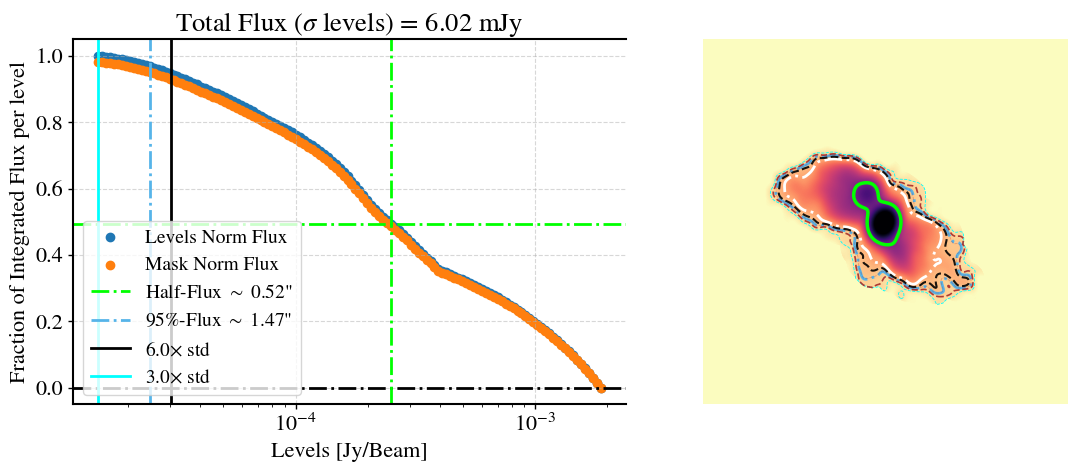

1


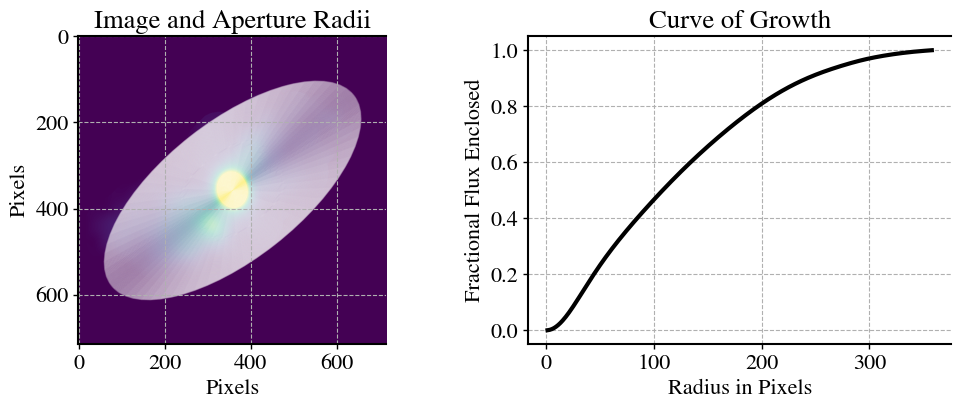

Rlast     >>  358
Rp        >>  290.03800760152035
Rtotal    >>  580.0760152030407
1


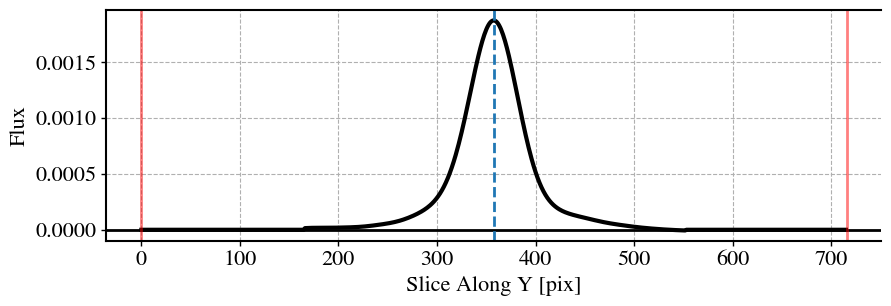

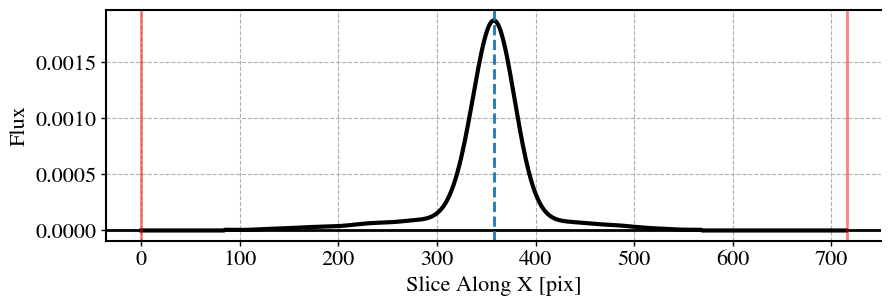

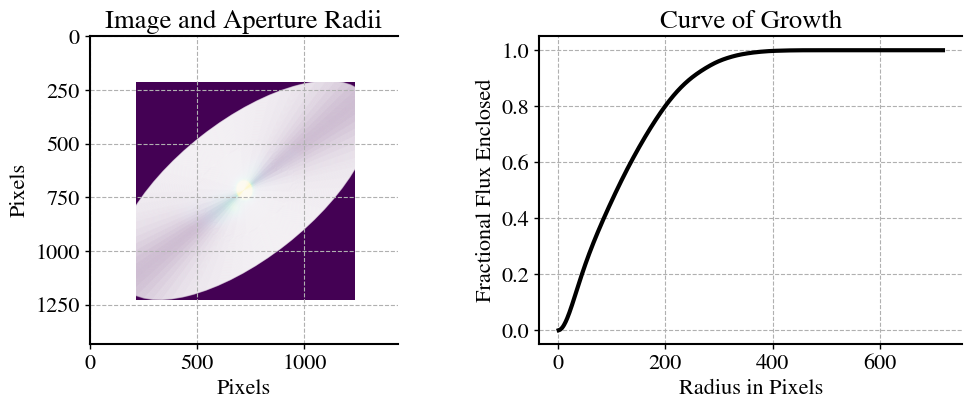

/run/media/sagauga/storage_wd_2/cloud/pcloud_void/PhD/GitHub/morphen/radio_morphen/../libs/libs.py:1579: RuntimeWarning: invalid value encountered in true_divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


eta = 0.2
epsilon = 2
r_half_light (old vs new) = 109.15
r_total_flux (old vs new) = 508.88
R50 =  109.14922984596919
Rp= 254.44248849769954


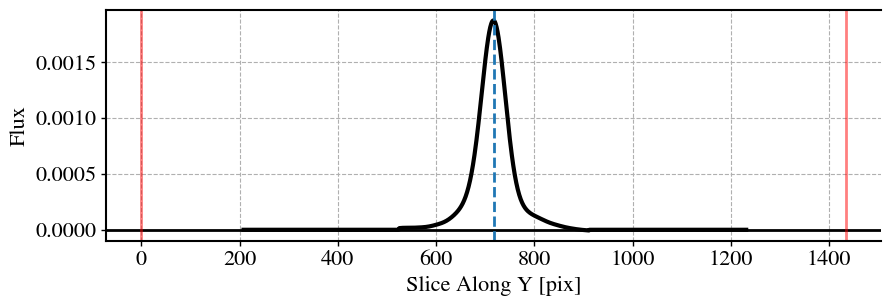

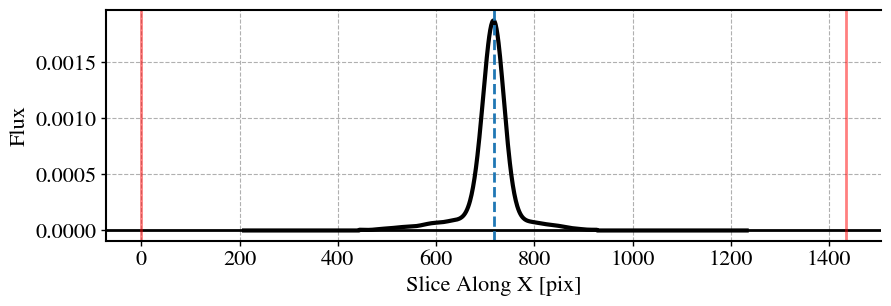

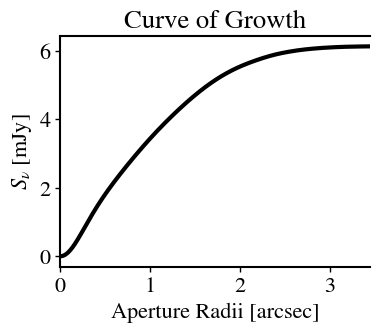

<Figure size 600x400 with 0 Axes>

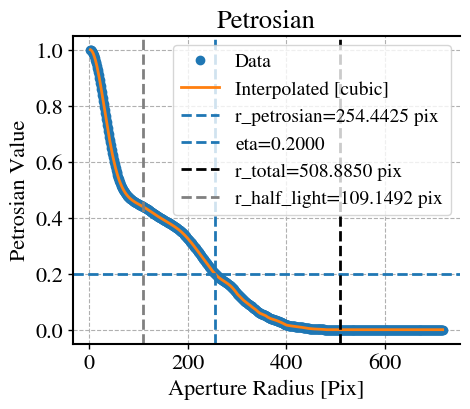

/run/media/sagauga/storage_wd_2/cloud/pcloud_void/PhD/GitHub/morphen/radio_morphen/../libs/libs.py:1579: RuntimeWarning: invalid value encountered in true_divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


D_a =  168.48244070796565 Mpc
Linear Distance =  6.534607382555773 pc
--==>> Computing asymetries...
--==>> Computing image statistics...
Estimate #1 of flux error (based on sum of residual map): 
Flux =  6.126315259668258 +/- 0.2922339357564654 mJy
Fractional error flux =  0.047701419755582404
-----------------------------------------------------------------
Estimate #2 of flux error (based on rms of residual x area): 
Flux =  6.126315259668258 +/- 0.4137549853826034 mJy
Fractional error flux =  0.06753733163333948
D_a =  168.48244070796565 Mpc
Linear Distance =  816.8259228194797 pc


In [61]:
image_measures, _ = measures(imagename=imagelist[idx], 
                          residualname=residuallist[idx], z=0.04, mask_component=None, sigma_mask=6,
                          last_level=3.0, vmin_factor=1.0, plot_catalog=True,data_2D=None,
                          npixels=128, fwhm=81, kernel_size=21, dilation_size=None,
                          main_feature_index=0, results_final={}, iterations=2,
                          fracX=0.10, fracY=0.10, deblend=False, bkg_sub=False,
                          bkg_to_sub=None, rms=None,do_petro=True,
                          apply_mask=True, do_PLOT=True, SAVE=True, show_figure=True,
                          mask=None,do_measurements='all',compute_A=True,
                          add_save_name='')

In [63]:
image_measures

{'total_flux': 0.006111316486034702,
 'inner_flux': 0.003549833072949846,
 'low_flux': 0.0005211671232820244,
 'mid_flux': 0.0017224539386352271,
 'uncertain_flux': 0.0003178623511676053,
 'inner_flux_f': 0.5808622546486931,
 'low_flux_f': 0.0852790269450079,
 'mid_flux_f': 0.2818466270845732,
 'uncertain_flux_f': 0.05201209132172579,
 'number_of_beams': 50.080800016580525,
 'n_beams_inner': 7.695589887298317,
 'n_beams_mid': 17.064200180155044,
 'n_beams_low': 14.293058272878756,
 'n_beams_uncertain': 19.647635505476785,
 'total_flux_nomask': 0.006263816425549067,
 'total_flux_mask': 0.0061263152596682585,
 'total_flux_levels': 0.006020352031792973,
 'x0': 507.5003615282908,
 'y0': 508.49994801289483,
 'x0m': 485.2511404949089,
 'y0m': 521.2752600833624,
 'PA': -38.117346247131536,
 'q': 0.445277954416228,
 'PAm': 142.3430361371262,
 'qm': 0.6352772984747399,
 'PAmi': 110.1229170179625,
 'qmi': 0.7894833758551614,
 'PAmo': 144.97434224492395,
 'qmo': 0.5624207727323515,
 'x0m_i': 504.

Note that multiple quantities are calculated (many of them are for testing purposes). The ones that may be interesting are: 
- `total_flux_mask` > Total integrated flux inside the mask
- `C50radii` > Half-light source radii
- `C95radii` > approximated full-size of the source
- `rms_residual` > background rms of the residual image
- `max_im` > peak of flux of the radio map
- `A50` > area enclosing the half-to-total flux (as multiple of the restoring beam area)
- `A95` > total estimated emission area (as multiple of the restoring beam area)
- `qmi` > median averaged axis ratio of the region enclosing the half-light flux
- `qmo` > median averaged axis ratio of the outer region (from A50)
- `PAmi` > median averaged position angle (in degrees) of the region enclosing the half-light flux
- `PAmo` > median averaged position angle (in degrees) of the outer region (from A50)


In [64]:
# proper estimate for the total integrated flux  (good estimate, even if image contains deconvolution errors). 
# However, sometimes may be underestimated. 
image_measures['total_flux_mask']

0.0061263152596682585

In [65]:
# upper total integrated flux  (may be overstimated if image contains deconvolution errors)
image_measures['total_flux_nomask']

0.006263816425549067

In [66]:
#total integrated flux  using the Petrosian method.
image_measures['total_flux_rp']

0.006126315365553589

In [67]:
#total integrated flux (only uses positive pixel values, ignores negative intensities)
image_measures['total_flux_levels']

0.006020352031792973

In [68]:
image_measures['PAmi']

110.1229170179625

In [69]:
image_measures['C50radii']

64.75657835760981

In [70]:
# convert to parsecs
image_measures['C50radii'] * image_measures['pix_to_pc']

423.15881500468845

In [71]:
image_measures['C95radii']

184.17398405150303

In [72]:
image_measures['r_total_flux']

508.8849769953991

In [73]:
image_measures['C1'], image_measures['C1p']

(0.6596737535673459, 0.6530563208292604)

In [74]:
image_measures['C2'], image_measures['C2p']

(0.3814176687907705, 0.35590768079688595)

In [75]:
image_measures['A0'], image_measures['A1']

(0.5309803848850986, 0.5309803848850987)

In [76]:
# def compute_flux_density_errors(residual_map, mask,BA):
#     # Compute the residual flux density using the given mask
#     masked_residual = residual_map * mask
#     residual_flux_density = np.sum(masked_residual)
    
#     # Compute the root-mean-square of the residual map within the area
#     residual_squared = np.square(residual_map)
#     residual_rms = np.sqrt(np.mean(residual_squared))
    
#     # Compute the weighted flux error
#     area = np.sum(mask)
#     flux_error = 1000*residual_rms * residual_flux_density * area/BA
    
#     return flux_error
def compute_flux_density_errors(residual_map, mask,BA):
    # Compute the residual flux density using the given mask
    masked_residual = residual_map * mask
    residual_flux_density = np.sum(masked_residual)
    
    # Compute the root-mean-square of the residual map within the area
    residual_squared = np.square(residual_map)
    residual_rms = np.sqrt(np.mean(residual_squared))
    
    # Compute the weighted flux error
    area = np.sum(mask)
    flux_error = 1000*residual_rms /BA
    
    return flux_error

In [37]:
compute_flux_density_errors(ctn(residuallist[idx]),mask,beam_area2(residuallist[idx]))

3.2746517268294915e-06

In [38]:
np.square??

Imported cmasher for density maps.If you would like to use, examples:CM = cmr.ember,CM = cmr.flamingo,CM = cmr.gothicCM = cmr.lavender


<Axes: xlabel='x pix', ylabel='y pix'>

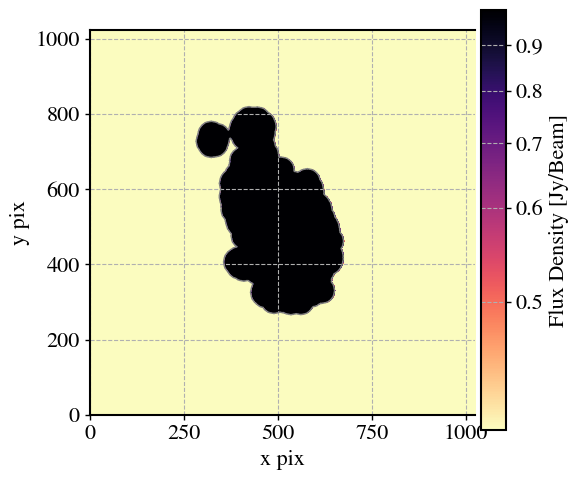

In [40]:
eimshow(mask)